<div style="background-color:#7B68EE; color:white; padding:15px; text-align:center; 
            font-size:24px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">🧠</span> Brain Stroke Prediction
</div>

<div style="text-align: center;">
        <img src="https://my.clevelandclinic.org/-/scassets/images/org/patient-experience/patient-stories/173-advanced-stroke-procedure-saves-patient-after-deep-brain-bleed/deep-brain-bleeds-new-2.gif?la=en.gif" 
        alt="Brain Stroke" style="width: 80%; height: auto;">
    </div>


 # Data info

# Import libraries

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Read Dataset 

In [7]:
## first dataset
df1=pd.read_csv(r"C:\Users\Ahmed Okasha\Downloads\stroke_data(40k,11).csv")

In [8]:
df1.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [9]:
# second dataset
df2=pd.read_csv(r"C:\Users\Ahmed Okasha\Downloads\healthcare-dataset-stroke-data.csv")
df2.drop(columns='id',inplace=True)
df2.rename(columns={'gender':'sex'},inplace=True)


In [10]:
df2.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## modify d2 to match d1 

In [12]:

def transform_sex(df):
    if df['sex']=='Male' :
      return 1
    elif df['sex']=='Female' :
        return 0
    else:
        return 'unknown'
        
def transform_ever_married(df):
    if df['ever_married']=='Yes' :
      return 1
    elif df['ever_married']=='No' :
        return 0
    else:
        return 'unknown'

def transform_work_type(df):
    if df['work_type']=='Never_worked' :
       return 0
    elif df['work_type']=='children' :
        return 1
    elif df['work_type']=='Govt_job' :
        return 2
    elif df['work_type']=='Self-employed' :
        return 3
    elif df['work_type']=='Private' :
        return 4     
    else:
        return 'unknown'

def transform_smoking_status(df):
    if df['smoking_status']=='never smoked' :
      return 0
    elif (df['smoking_status']=='formerly smoked') |( df['smoking_status']=='smokes' ):
        return 1
        
    else:
        return 'unknown'
        
def transform_Residence_type(df):
    if df['Residence_type']=='Urban' :
      return 1
    elif df['Residence_type']=='Rural' :
        return 0
    else:
        return 'unknown'        

In [13]:
df2['sex']=df2.apply(transform_sex,axis=1)
df2['ever_married']=df2.apply(transform_ever_married,axis=1)
df2['work_type']=df2.apply(transform_work_type,axis=1)
df2['smoking_status']=df2.apply(transform_smoking_status,axis=1)
df2['Residence_type']=df2.apply(transform_Residence_type,axis=1)



In [14]:
df2.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,4,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,0,1
2,1,80.0,0,1,1,4,0,105.92,32.5,0,1
3,0,49.0,0,0,1,4,1,171.23,34.4,1,1
4,0,79.0,1,0,1,3,0,174.12,24.0,0,1


## merge d1 & d2

In [16]:
## combine the  DataFrame
df = pd.concat([df1,df2])
df.sample(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5094,0.0,50.0,1,0,1,3,0,174.12,24.0,0,1
13801,1.0,48.0,0,0,1,3,1,76.57,34.1,0,1
115,1.0,58.0,0,0,1,4,1,221.89,37.3,1,1
1934,1,57.0,0,0,1,4,0,89.81,35.6,0,0
8998,1.0,76.0,1,0,1,4,0,243.58,33.6,0,1
4033,1.0,13.0,0,0,1,3,0,78.80,29.3,1,1
24141,0.0,33.0,0,0,0,4,1,103.61,31.4,0,0
11768,0.0,30.0,0,0,1,3,0,92.98,25.6,0,1
11345,1.0,44.0,0,0,1,2,1,131.41,28.4,0,1
10128,1.0,15.0,0,0,1,3,1,116.10,27.1,0,1


# EDA

In [18]:
# shape
df.shape

(46020, 11)

In [19]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46020 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                46017 non-null  object 
 1   age                46020 non-null  float64
 2   hypertension       46020 non-null  int64  
 3   heart_disease      46020 non-null  int64  
 4   ever_married       46020 non-null  int64  
 5   work_type          46020 non-null  int64  
 6   Residence_type     46020 non-null  int64  
 7   avg_glucose_level  46020 non-null  float64
 8   bmi                45819 non-null  float64
 9   smoking_status     46020 non-null  object 
 10  stroke             46020 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.2+ MB


In [20]:
# check missing values

df.isnull().sum()

sex                    3
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
## mis value treatment

df=df.dropna()

In [22]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
## check duplication

df.duplicated().sum()

245

In [24]:
# drop duplication

df = df.drop_duplicates()
df.duplicated().sum() 

0

In [25]:
# Value Counts of Categorical Features in the Dataset

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']
for col in categorical_features:
   print (df[col].value_counts())
   print(" ")


sex
1.0        24605
0.0        20965
unknown        1
Name: count, dtype: int64
 
hypertension
0    36437
1     9134
Name: count, dtype: int64
 
heart_disease
0    40143
1     5428
Name: count, dtype: int64
 
ever_married
1    36589
0     8982
Name: count, dtype: int64
 
Residence_type
1    23425
0    22146
Name: count, dtype: int64
 
smoking_status
0          22658
1          21430
unknown     1483
Name: count, dtype: int64
 


In [26]:
## remove unknown value

df=df[df['sex']!= 'unknown' ]
df=df[df['smoking_status']!= 'unknown']

In [27]:
## convert object columns(sex & smoking_status) to numerical

df['sex']=df['sex'].astype('float64')
df['smoking_status']=df['smoking_status'].astype('int64')

In [28]:
##  descriptive ststistics

df.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,44087.000000,44087.000000,44087.000000,44087.000000,44087.000000,44087.000000,44087.000000,44087.000000,44087.000000,44087.000000,44087.000000
mean,0.542858,51.047860,0.206206,0.122281,0.816204,3.459387,0.514437,120.975785,30.397228,0.486062,0.464082
std,0.498165,21.444611,0.404585,0.327614,0.387322,0.786474,0.499797,56.962529,6.874771,0.499811,0.498714
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.480000,25.800000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.760000,29.400000,0.000000,0.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,159.835000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [29]:
## number of age less than 1
(df['age']<=0).sum()

81

In [30]:
#number of unique values in each column

unique_vals=[]
for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Present using  dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
sex,2
age,111
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,2903
bmi,370
smoking_status,2


In [31]:
#"Value Counts of Categorical Features in  Dataset after remove unknown"

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']

value_counts_df = pd.DataFrame({col: df[col].value_counts() for col in categorical_features})

from IPython.display import display

display(value_counts_df)


# categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']
# for col in categorical_features:
#    print (df[col].value_counts())
#    print(" ")

,sex,hypertension,heart_disease,ever_married,Residence_type,smoking_status
0.0,20154,34996,38696,8103,21407,22658
1.0,23933,9091,5391,35984,22680,21429


In [32]:
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

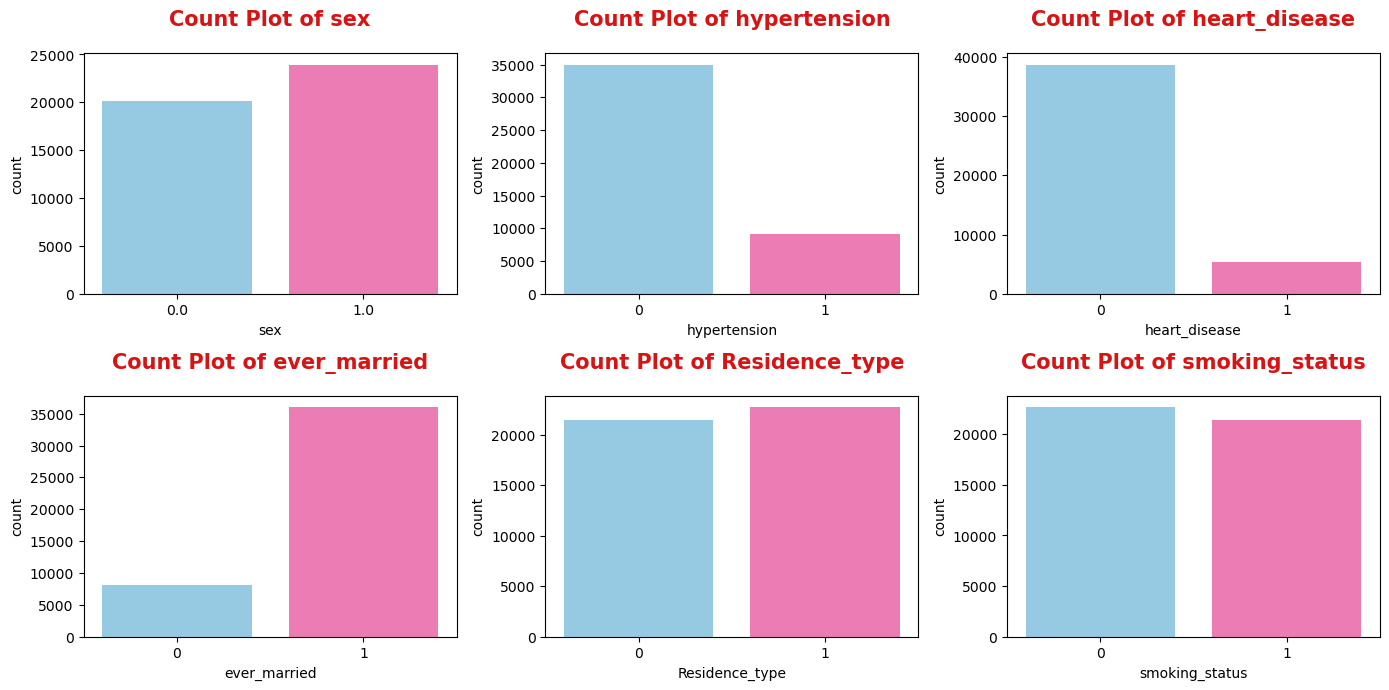

In [33]:
#Presenting the countplots for categorical features

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette=colors)
    plt.title(f"Count Plot of {col}",weight = "bold", color = "#D71313", fontsize = 15, pad=20 )
plt.tight_layout()
plt.show()

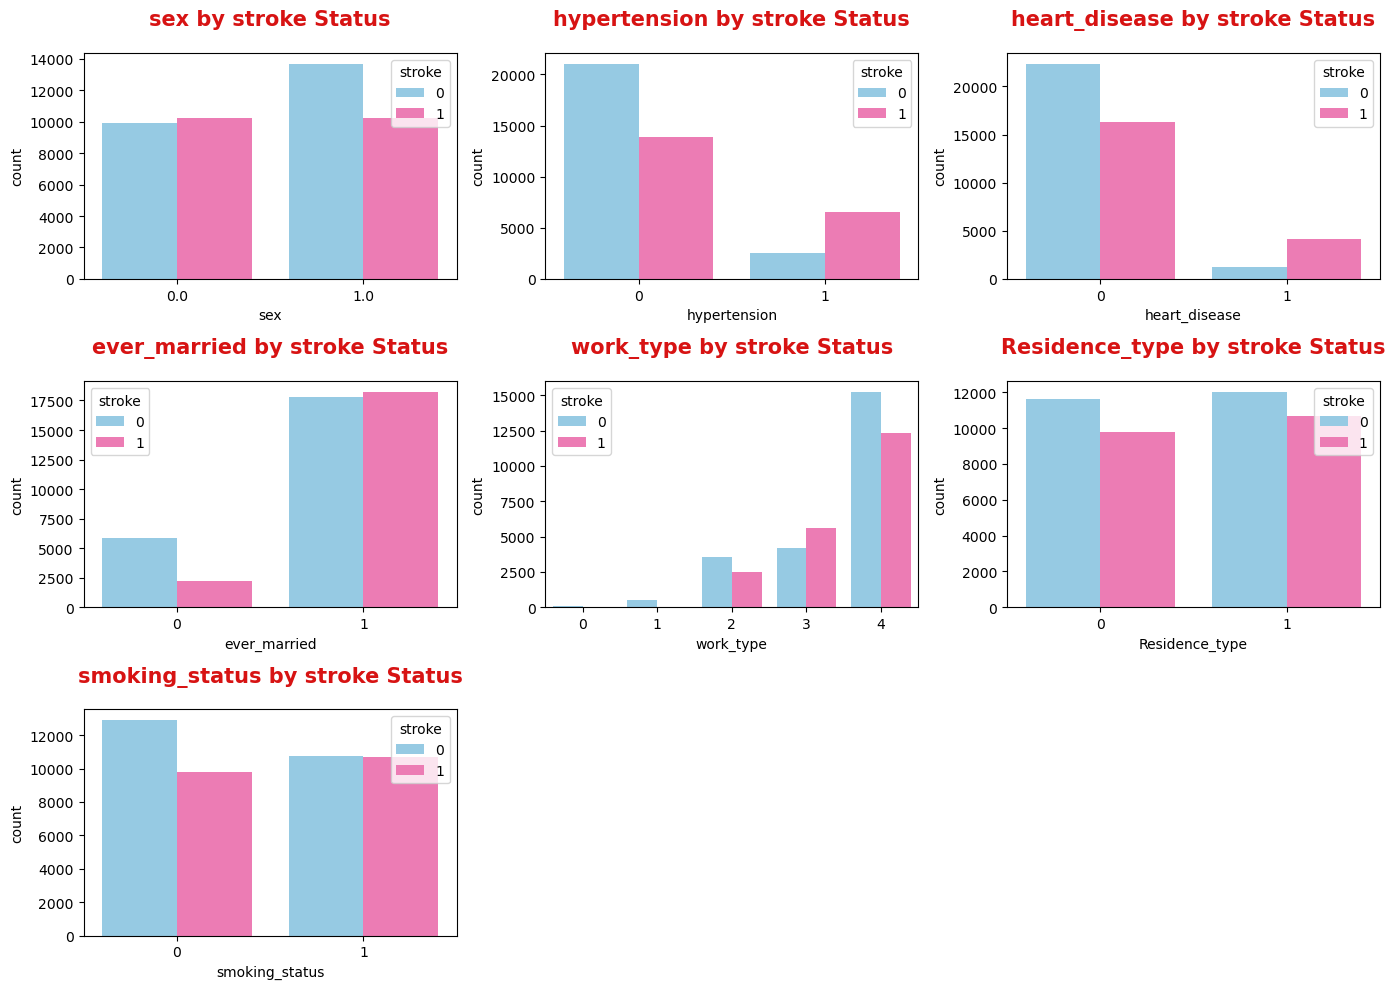

In [34]:
## Presenting Relationship between feature & target

col=['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status']
plt.figure(figsize=(14, 10))
for i, col in enumerate(col, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='stroke', palette=colors)
    plt.title(f"{col} by stroke Status",weight = "bold", color = "#D71313", fontsize = 15, pad=20)
plt.tight_layout()
plt.show()

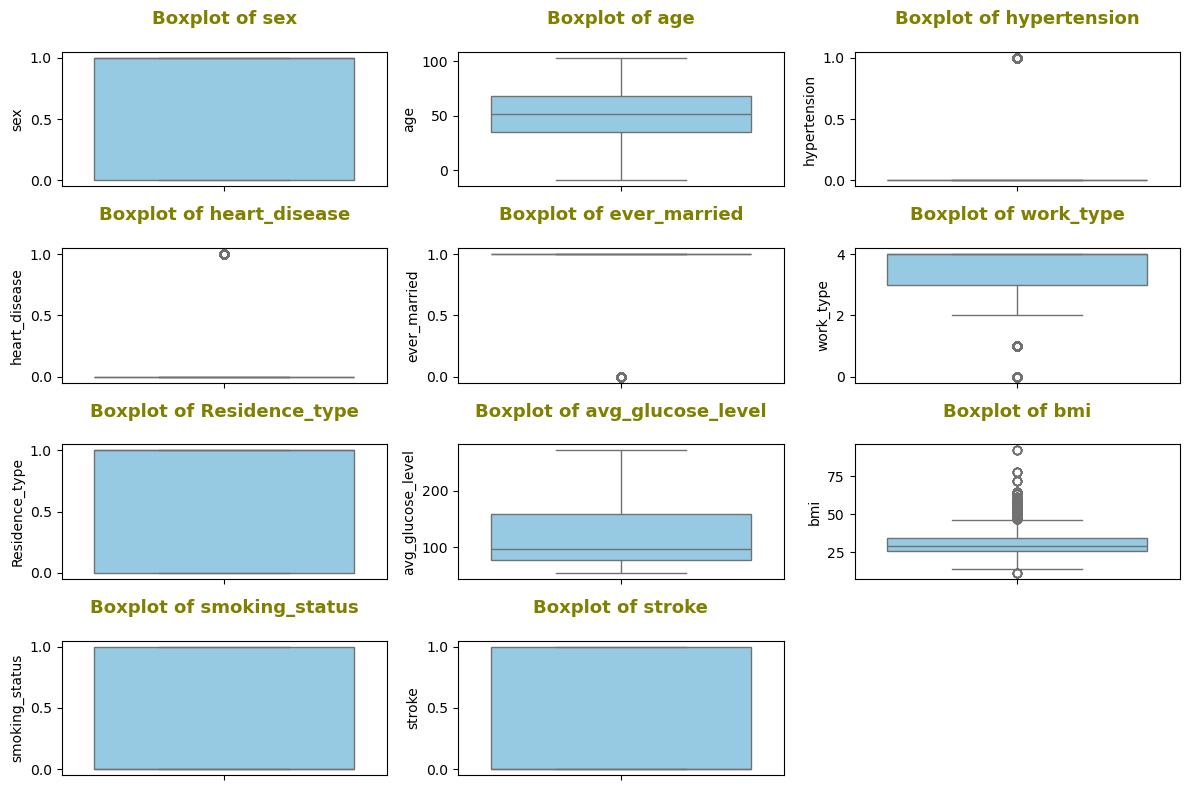

In [35]:
## Boxplot to identify outliers

plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, y=col, palette=colors)
    plt.title(f"Boxplot of {col}",weight = "bold",color='#808000', fontsize = 13, pad=20)
plt.tight_layout()
plt.show()

<Axes: >

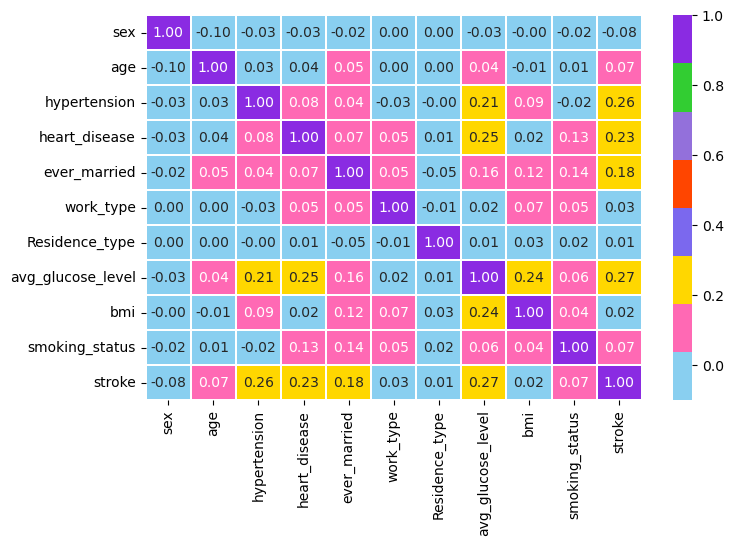

In [36]:
## correlation 
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap=colors[:8],linewidths=0.1,fmt='0.2f')

# Data cleaning and preprocessing

In [38]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# miss value & duplication treatment 
 we have recently eliminated the missing values & duplication

In [40]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [41]:
df.duplicated().sum() 

0

## outliers treatments

In [43]:
## age less than 0
(df['age']<=0).sum()

81

In [44]:
## drop age less than 0
df=df[df['age']>0]

In [45]:
# check 
(df['age']<=0).sum()

0

In [46]:
df['age'].max()

103.0

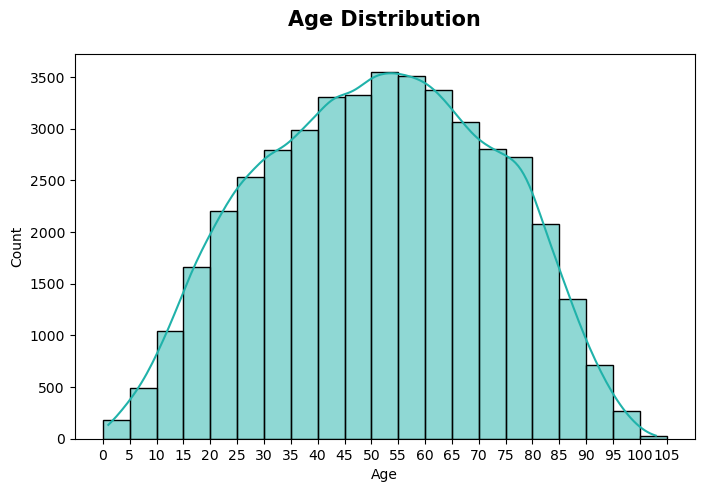

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color="#20B2AA",bins=np.arange(0,106,5))
plt.title("Age Distribution",weight = "bold", fontsize = 15, pad=20)
plt.xlabel("Age")
plt.xticks(np.arange(0,106,5))
plt.show()

In [48]:
### bmi outliers

def wisker (col) :
    q1,q3=np.percentile(col,[25,75])
    range_q=q3-q1
    lw=q1-1.5*range_q
    uw=q3+1.5*range_q
    return lw,uw

wisker(df['bmi'])

(13.35, 46.550000000000004)

In [49]:
# adjust rows with outliers

lw,um=wisker(df['bmi'])

df['bmi']=np.where(df['bmi']<lw,lw,df['bmi'])

df['bmi']=np.where(df['bmi']>um,um,df['bmi'])

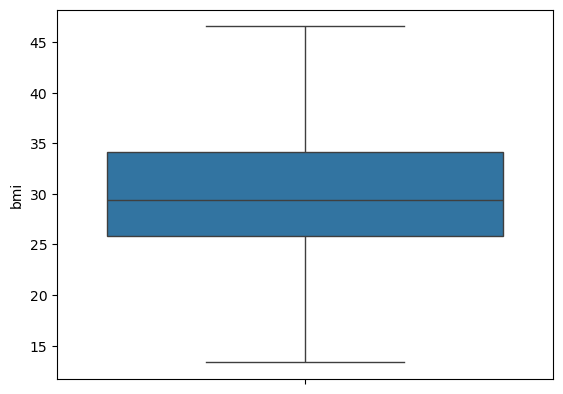

In [50]:
## check
sns.boxplot(df['bmi'])
plt.show()

In [51]:
lower_bound,upper_bound = wisker(df['avg_glucose_level'])
print("lower_bound: ",lower_bound,"\nupper_bound: ",upper_bound)

lower_bound:  -42.88499999999998 
upper_bound:  280.755


In [52]:
## check num of glucose outlier 
((df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)).sum()

0

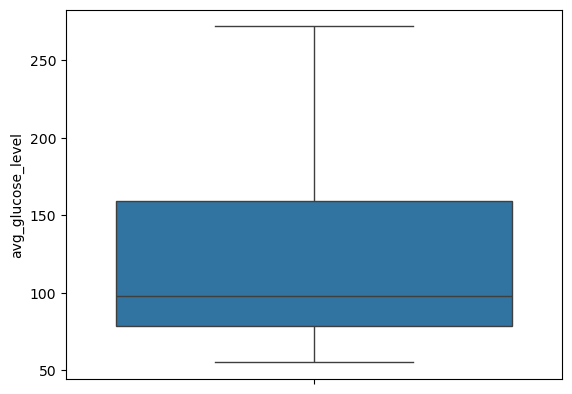

In [53]:
sns.boxplot(df['avg_glucose_level'])
plt.show()

# visualizations

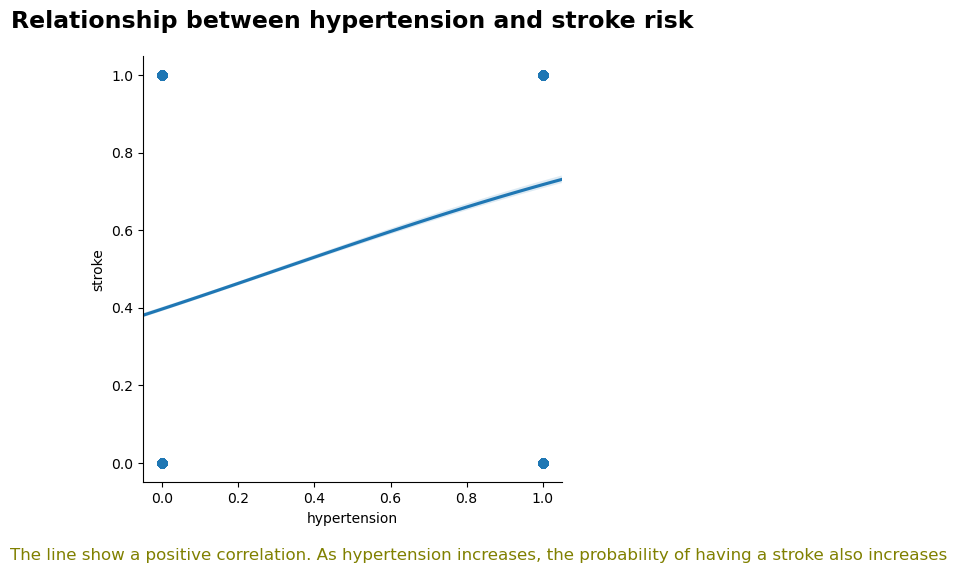

In [55]:
## Regression plot to identify Relationship between hypertension and stroke risk

sns.lmplot(x='hypertension',y='stroke',data=df,logistic=True,truncate=False,palette=colors,)
plt.title("Relationship between hypertension and stroke risk",weight = "bold", fontsize = 17, pad=20)

plt.text(-0.4,-0.25,"The line show a positive correlation. As hypertension increases, the probability of having a stroke also increases",
         fontdict={'color':'#808000','fontsize':12})
plt.show()

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The line show a positive correlation. As hypertension increases, the probability of having a stroke also increases</b></div>


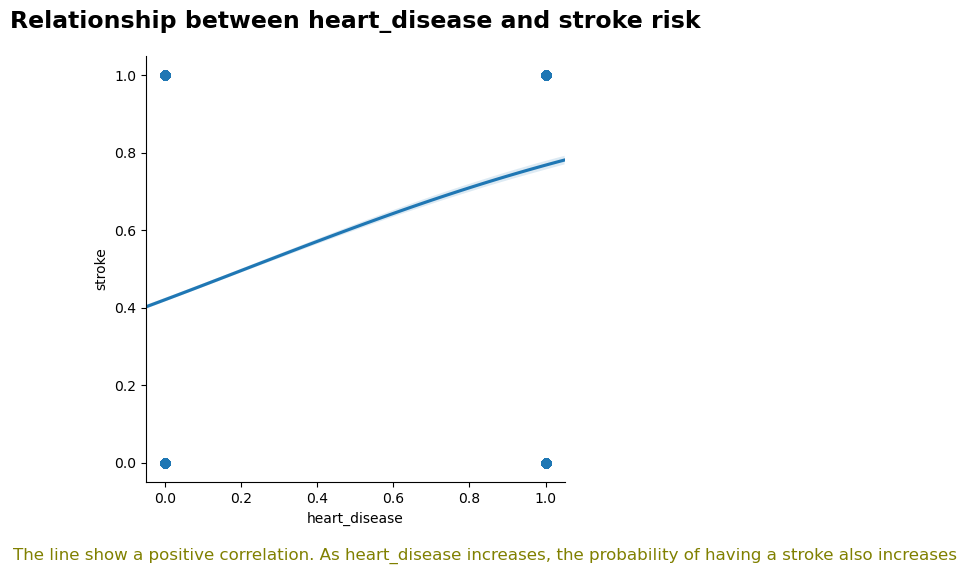

In [57]:
#### Regression plot to identify Relationship between heart_disease and stroke risk


sns.lmplot(x='heart_disease',y='stroke',data=df,logistic=True,truncate=False)
plt.title("Relationship between heart_disease and stroke risk",weight = "bold", fontsize = 17, pad=20)

plt.text(-0.4,-0.25,"The line show a positive correlation. As heart_disease increases, the probability of having a stroke also increases",
        fontdict={'color':'#808000','fontsize':12})
plt.show()

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The line show a positive correlation. As heart_disease increases, the probability of having a stroke also increases</b></div>


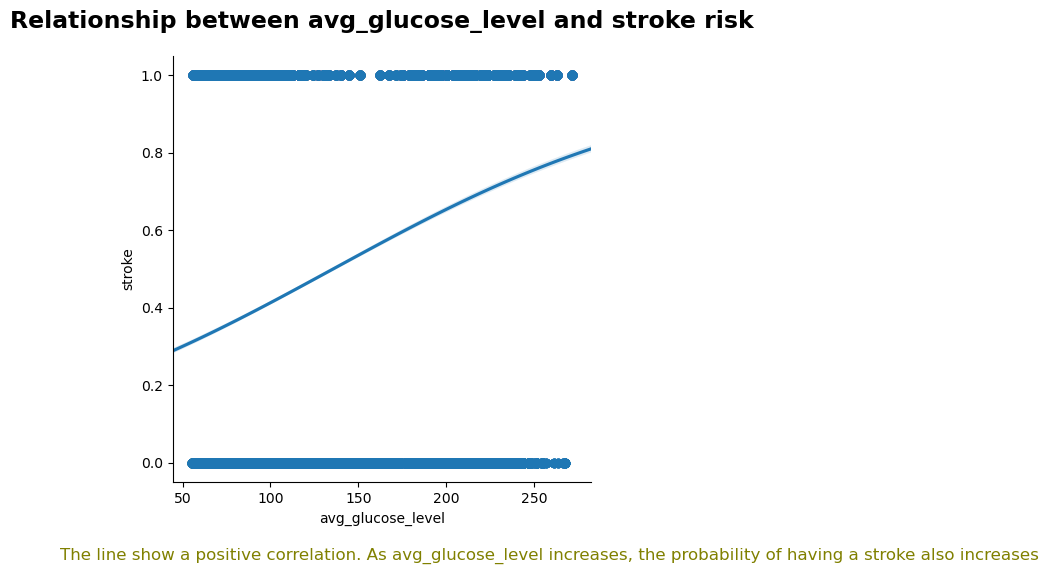

In [59]:
## Regression plot to identify Relationship between avg_glucose_level and stroke risk


sns.lmplot(x='avg_glucose_level',y='stroke',data=df,logistic=True,truncate=False)
plt.title("Relationship between avg_glucose_level and stroke risk",weight = "bold", fontsize = 17, pad=20)

plt.text(-20,-0.25,"The line show a positive correlation. As avg_glucose_level increases, the probability of having a stroke also increases",
        fontdict={'color':'#808000','fontsize':12})
plt.show()

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The line show a positive correlation. As avg_glucose_level increases, the probability of having a stroke also increases</b></div>


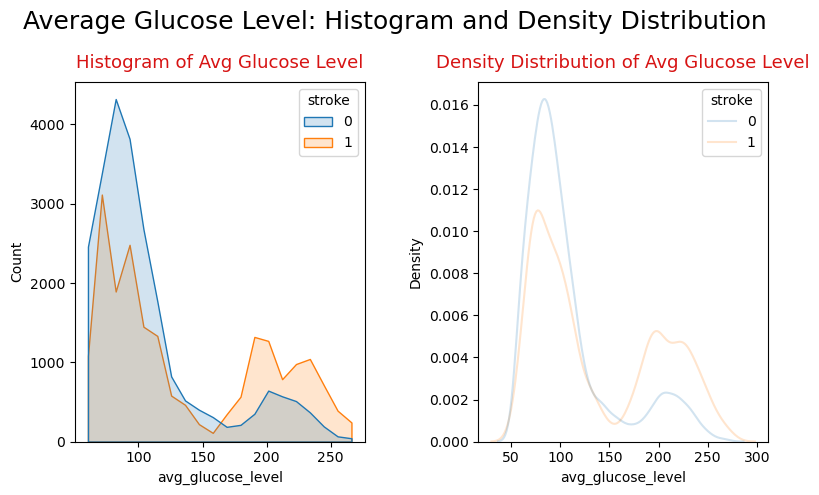

In [61]:
## Average Glucose Level: Histogram and Density Distribution

plt.figure(figsize=(8, 5))
plt.subplot(1, 2,1)
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', element='poly',bins=20, alpha=0.2)
plt.title('Histogram of Avg Glucose Level',color="#D71313", fontsize = 13, pad=10)

plt.subplot(1, 2,2)
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', common_norm=False,alpha=0.2)
plt.title('Density Distribution of Avg Glucose Level',color="#D71313", fontsize = 13, pad=10)

plt.suptitle('Average Glucose Level: Histogram and Density Distribution',fontsize=18)
plt.subplots_adjust(left=0.2,right=0.3)
plt.tight_layout()
plt.show()


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The average glucose level distributions of stroke vs non-stroke cases are quite different. In particular,
the secondary peak at around 200-220 glucose level is higher in the case of stroke cases.</b></div>


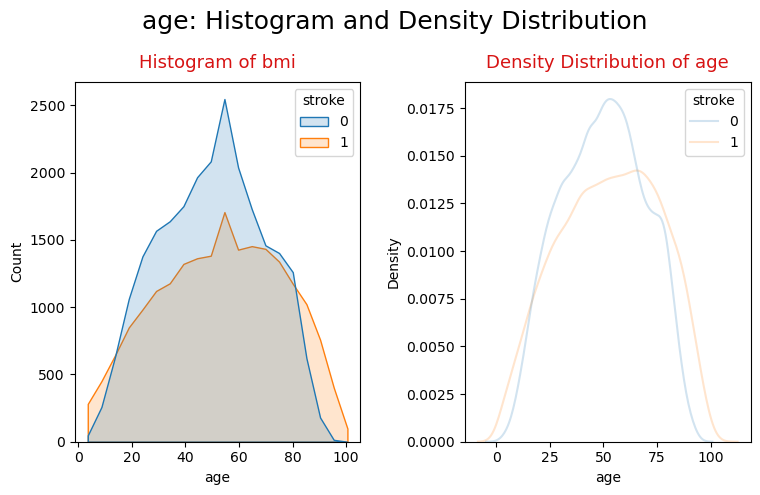

In [63]:
## Age: Histogram and Density Distribution

plt.figure(figsize=(8, 5))
plt.subplot(1, 2,1)
sns.histplot(data=df, x='age', hue='stroke', element='poly',bins=20, alpha=0.2)
plt.title('Histogram of bmi',color="#D71313", fontsize = 13, pad=10)

plt.subplot(1, 2,2)
sns.kdeplot(data=df, x='age', hue='stroke', common_norm=False,alpha=0.2)
plt.title('Density Distribution of age',color="#D71313", fontsize = 13, pad=10)

plt.suptitle('age: Histogram and Density Distribution',fontsize=18)
plt.subplots_adjust(left=0.2,right=0.3)
plt.tight_layout()
plt.show()


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Stroke cases (stroke=1, orange) are more prevalent in middle-aged and older individuals (40+ years), aligning with known medical research that stroke risks increase with age.
            The density plot further confirms that stroke cases (stroke=1) peak around 50 to 70 years,
            This suggests that stroke is more common in older populations compared to younger individuals.</b></div>

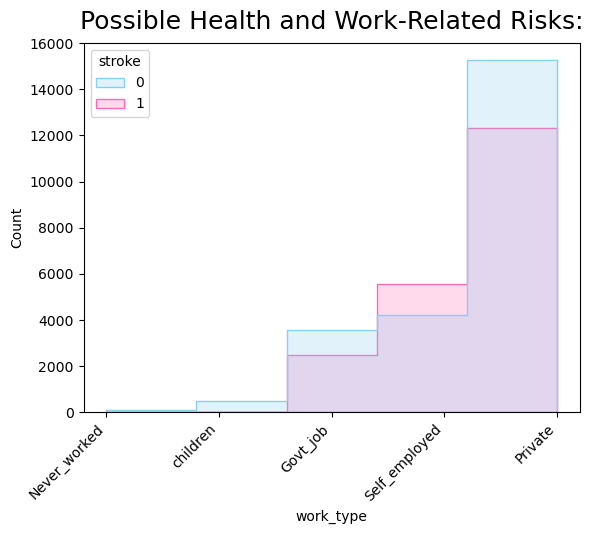

In [65]:
#Impact of Work Type on Stroke Incidence

sns.histplot(data=df, x="work_type",bins=20,binwidth=0.8,hue="stroke",element='step',palette= ["#89CFF0", "#FF69B4"])
plt.xticks(ticks=[0,1,2,3,4],labels=['Never_worked','children','Govt_job','Self_employed','Private'],rotation=45, ha="right")
plt.title('Possible Health and Work-Related Risks:', fontsize = 18, pad=10)
plt.show()


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The relatively higher stroke cases in "Self-employed" and "Private" sectors could indicate work-relatedstress or lifestyle factors contributing to health risks.
This insight might be useful for further research into workplace well-being and health management</b></div>

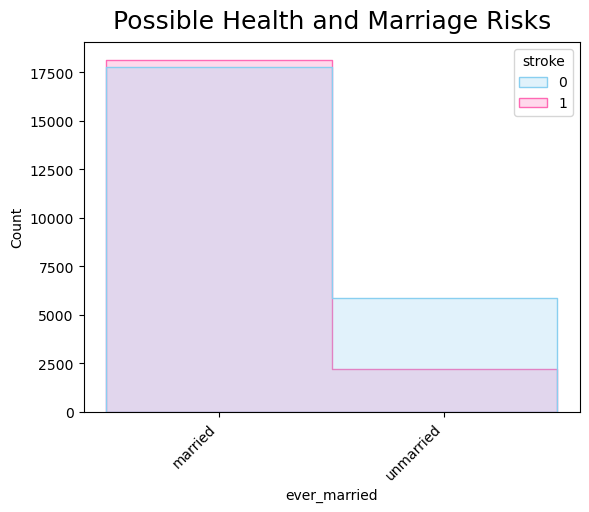

In [228]:
#Impact of Marriage on Stroke Incidence

copy_df=df.copy()
def transform_ever_married(df):
    if df['ever_married']==1 :
      return 'married'
    elif df['ever_married']==0 :
        return 'unmarried'

copy_df['ever_married']=df.apply(transform_ever_married,axis=1)

sns.histplot(data=copy_df, x="ever_married",bins=20,binwidth=0.8,hue="stroke",element='step',palette= ["#89CFF0", "#FF69B4"])
plt.xticks(rotation=45, ha="right")
plt.title('Possible Health and Marriage Risks', fontsize = 18, pad=10)
plt.show()

In [258]:
group_df=df.groupby(['ever_married','stroke']).size().reset_index(name='count')
group_df['ever_married'] = group_df['ever_married'].map({1: 'Married', 0: 'Unmarried'})
group_df['stroke'] = group_df['stroke'].map({1: 'have stroke', 0: 'not have stroke'})

group_df


,ever_married,stroke,count
0,Unmarried,not have stroke,5871
1,Unmarried,have stroke,2220
2,Married,not have stroke,17756
3,Married,have stroke,18159


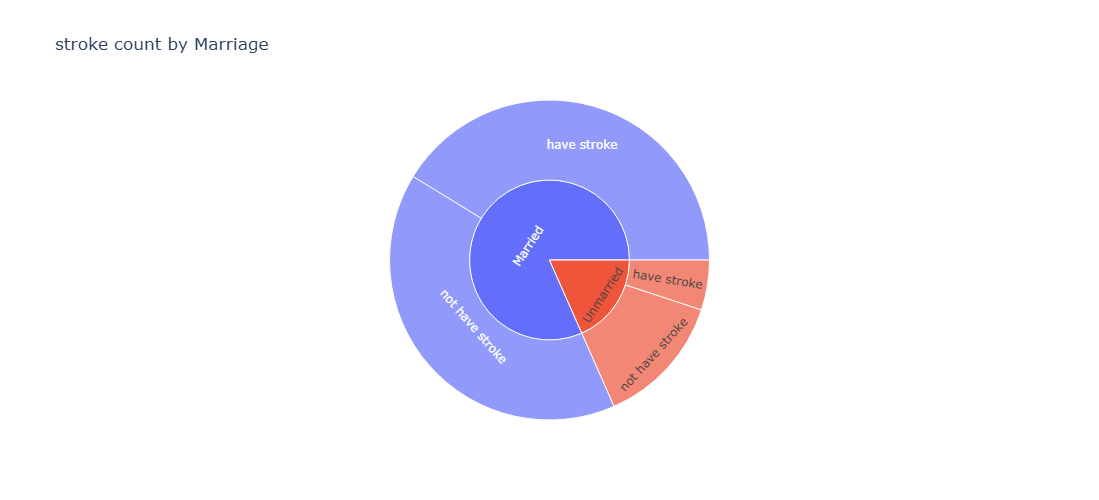

In [263]:
import plotly.express as px

px.sunburst(group_df,path=['ever_married','stroke'],values='count',title='stroke count by Marriage',height=500,width=700)


In [267]:
# Calculation the stroke percentage within each group of ever_married to understand the actual risk


married_yes_stroke=group_df[(group_df['ever_married']=='Married') & (group_df['stroke']=='have stroke')]['count'].sum()
unmarried_yes_stroke=group_df[(group_df['ever_married']=='Unmarried') & (group_df['stroke']=='have stroke')]['count'].sum()

count_married=group_df[group_df['ever_married']=='Married']['count'].sum()
count_unmarried=group_df[group_df['ever_married']=='Unmarried']['count'].sum()

percentage_married_yes_stroke=married_yes_stroke/count_married
percentage_unmarried_yes_stroke=unmarried_yes_stroke/count_unmarried
print('percentage of married who had stroke : ',percentage_married_yes_stroke)
print('percentage of unmarried who had stroke : ',percentage_unmarried_yes_stroke)


percentage of married who had stroke :  0.5056104691633022
percentage of unmarried who had stroke :  0.27437893956247683


<div style="padding:10px;
            color:#FF0000;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #000000;
            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b> Through these percentages, we notice that the percentage of infected people is higher among married people
 but married individuals might be older on average, increasing their stroke risk or other factors
 (heart_disease, blood pressure, glucose levels)  we must Investigate this risk factors to check for correlationst</b></div>


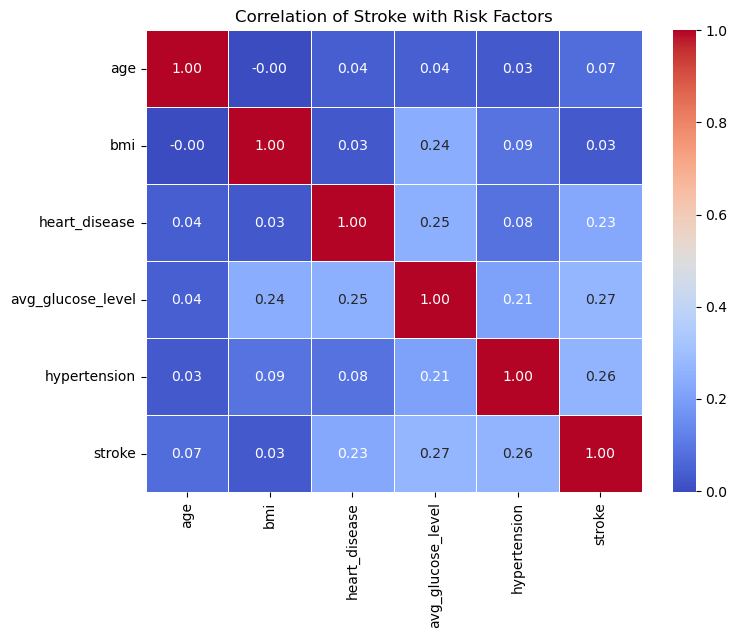

In [281]:
## Correlation of Stroke with Risk Factors

risk_factors = ["age", "bmi","heart_disease", "avg_glucose_level", "hypertension"]
correlation = df[risk_factors + ["stroke"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Stroke with Risk Factors")
plt.show()

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b> Correlation Heatmap Observations:
The highest correlation with stroke is average glucose level (0.27), followed by hypertension (0.26) followed by heart_disease(0.23).
Age has a weaker correlation with stroke (0.07), which suggests that while older individuals are more at risk, other factors might play a bigger role.
BMI has the weakest correlation (0.03), indicating that weight alone may not be a strong predictor of stroke in this dataset.
</b></div>


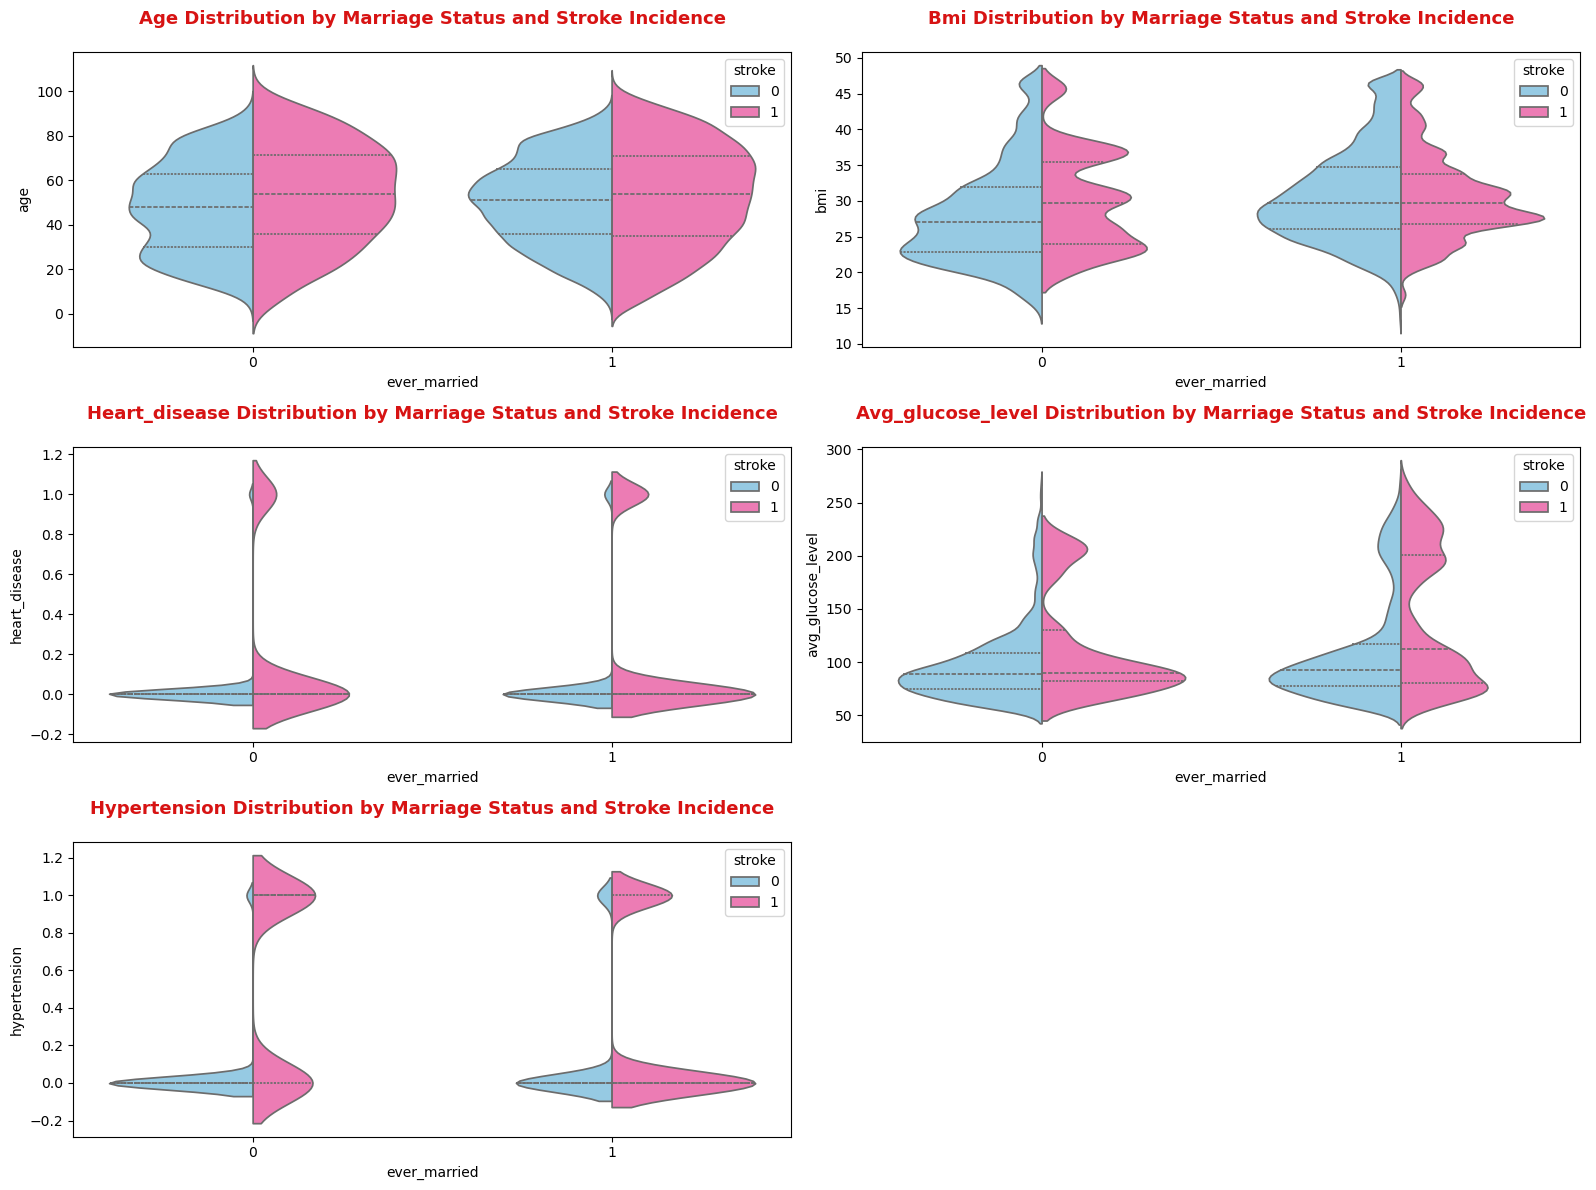

In [293]:

# Violin plots to compare distributions
plt.figure(figsize=(16, 12))

for i, factor in enumerate(risk_factors,1):
    plt.subplot(3,2,i)
    sns.violinplot(data=df, x="ever_married", y=factor, hue="stroke", split=True, inner="quart", palette=["#89CFF0", "#FF69B4"])
    plt.title(f"{factor.capitalize()} Distribution by Marriage Status and Stroke Incidence",weight = "bold", color = "#D71313", fontsize = 13, pad=20)

plt.tight_layout()
plt.show()


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Marriage itself is not necessarily a risk factor for stroke. Instead, age, glucose levels, and hypertension seem to be more significant contributors.
Married individuals might appear to have a higher stroke rate because they tend to be older
</b></div>

